<a href="https://colab.research.google.com/github/shb8086/Weather-Forecast/blob/main/svalbard_climate_1912_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [90]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/svalbard-climate-1912-2017.csv")
data=data.drop(columns=['D-J-F',  'M-A-M', 'J-J-A',  'S-O-N'])
data=data.dropna(axis=0)
#print(data)
X=[]
Y=[]
for i in data.YEAR:
    X.append([1,i])
for i in data.metANN:
        Y.append(i)

X= np.asarray(X)
Y= np.asarray(Y)
print(X, Y, sep="\n")

[[   1 1912]
 [   1 1913]
 [   1 1914]
 [   1 1915]
 [   1 1916]
 [   1 1917]
 [   1 1918]
 [   1 1919]
 [   1 1920]
 [   1 1921]
 [   1 1922]
 [   1 1923]
 [   1 1924]
 [   1 1925]
 [   1 1926]
 [   1 1927]
 [   1 1928]
 [   1 1929]
 [   1 1930]
 [   1 1931]
 [   1 1932]
 [   1 1933]
 [   1 1934]
 [   1 1935]
 [   1 1936]
 [   1 1937]
 [   1 1938]
 [   1 1939]
 [   1 1940]
 [   1 1941]
 [   1 1942]
 [   1 1943]
 [   1 1944]
 [   1 1945]
 [   1 1946]
 [   1 1947]
 [   1 1948]
 [   1 1949]
 [   1 1950]
 [   1 1951]
 [   1 1952]
 [   1 1953]
 [   1 1954]
 [   1 1955]
 [   1 1956]
 [   1 1957]
 [   1 1958]
 [   1 1959]
 [   1 1962]
 [   1 1963]
 [   1 1964]
 [   1 1965]
 [   1 1966]
 [   1 1967]
 [   1 1968]
 [   1 1969]
 [   1 1970]
 [   1 1971]
 [   1 1972]
 [   1 1973]
 [   1 1974]
 [   1 1975]
 [   1 1978]
 [   1 1980]
 [   1 1982]
 [   1 1983]
 [   1 1984]
 [   1 1985]
 [   1 1986]
 [   1 1987]
 [   1 1988]
 [   1 1989]
 [   1 1990]
 [   1 1991]
 [   1 1992]
 [   1 1993]
 [   1 1994]

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
x = np.matrix(X[:,1]).T
y = Y
svr_rbf = SVR(kernel='rbf', C=100.0, gamma=0.1)
svr_lin = SVR(kernel='linear', C=100.0)
y_lin = svr_lin.fit(x, y).predict(x)
y_rbf = svr_rbf.fit(x,y).predict(x)
x_predict = range(2016, 2025)
y_predict = svr_rbf.fit(x,y).predict(np.matrix(x_predict).T)
print(y_predict)

[-0.16013258  1.85124944  2.39332816  1.14088439 -0.93314837 -2.7057814
 -3.74203267 -4.19064838 -4.33968598]


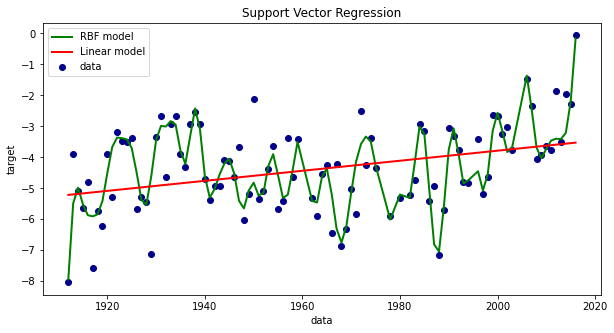

In [92]:
import matplotlib.pyplot as plt
lw = 2
plt.figure(figsize=(10,5))
plt.scatter(X[:,1], y, color='darkblue', label='data')
plt.plot(X[:,1], y_rbf, color='green', lw=lw, label='RBF model')
plt.plot(X[:,1], y_lin, color='red', lw=lw, label='Linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
